# Многопоточность (Threading)
(выполнять в PyCharm!!!)

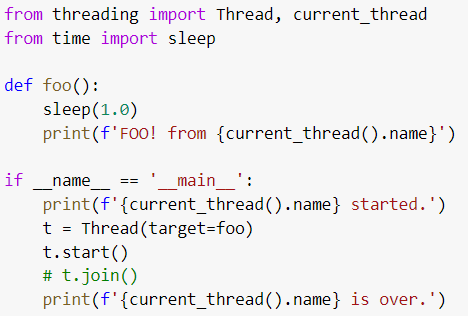

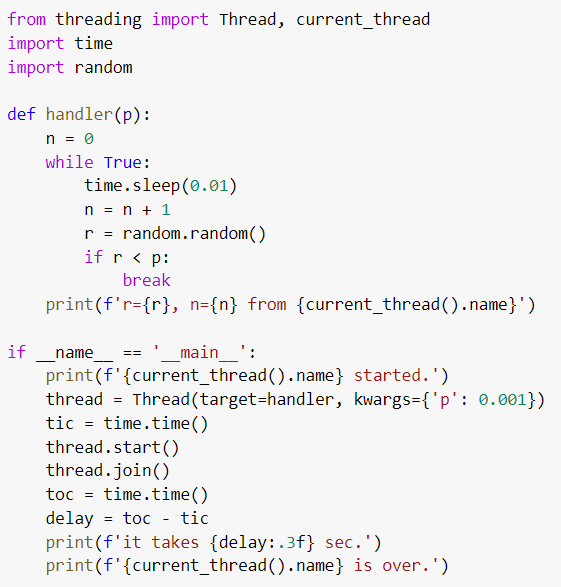

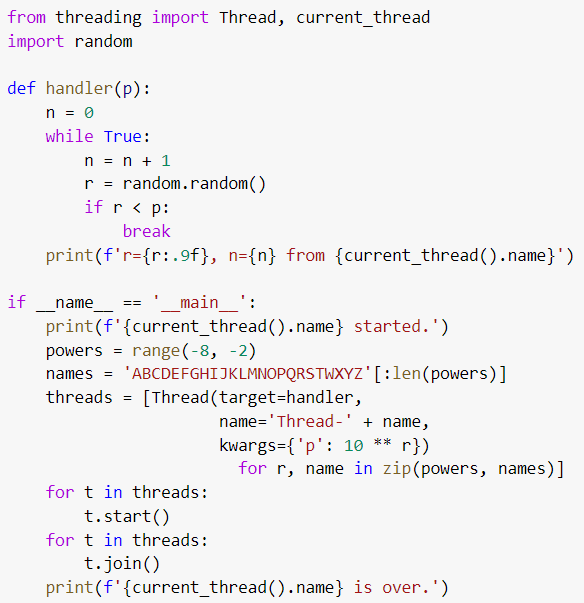

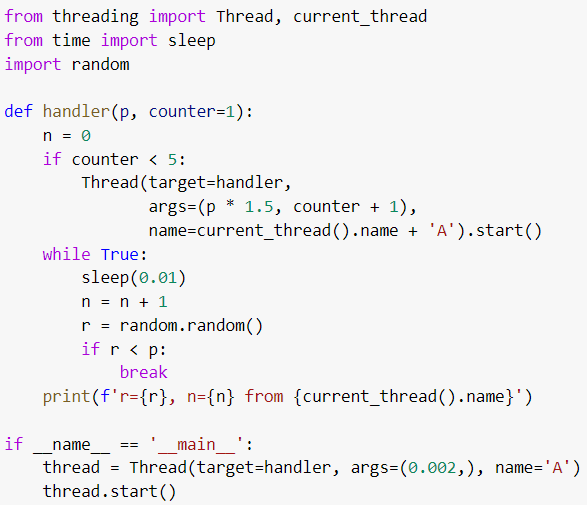

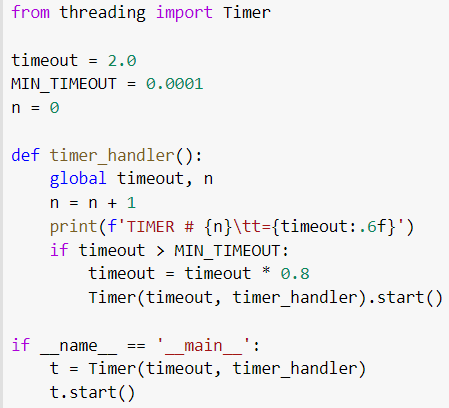

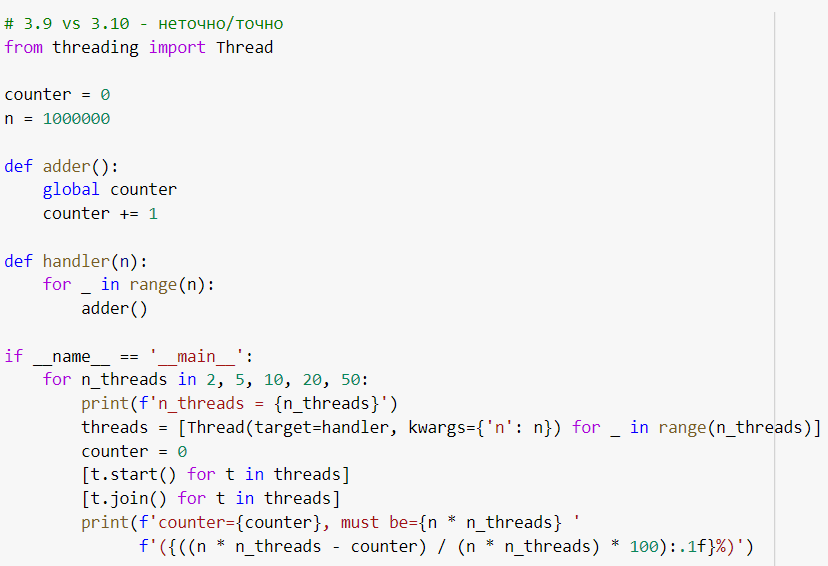

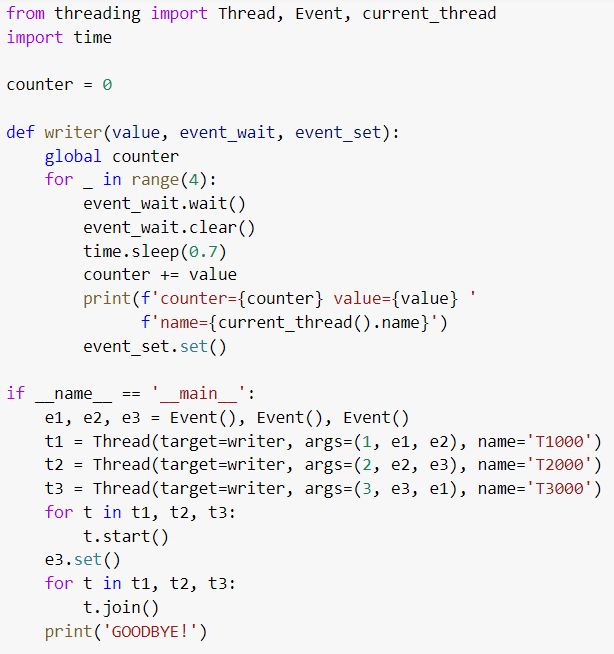

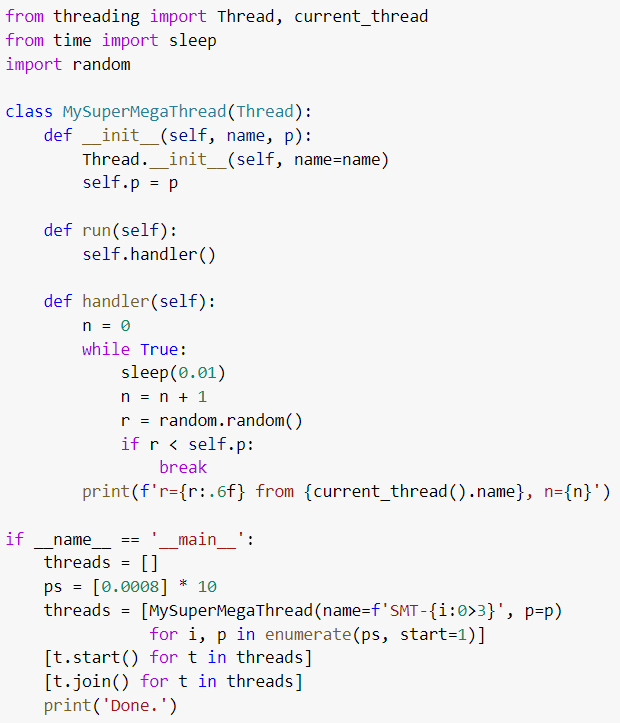

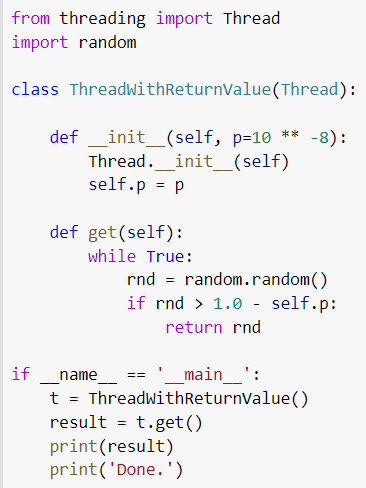

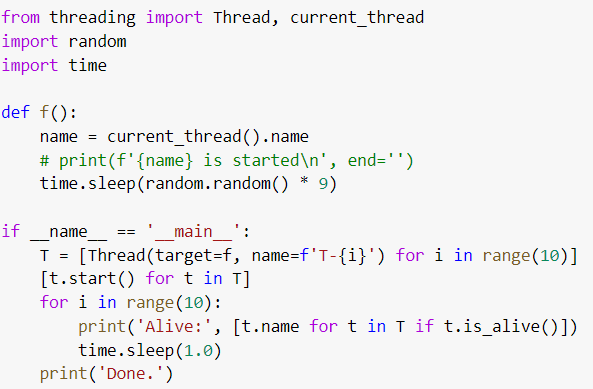

In [ ]:
from threading import Thread, current_thread
import time, random

CHANNEL_FREE = 'FREE'
channel_state = CHANNEL_FREE
TIME_TO_PASS_CHANNEL = 3.0
ships_in_harbour = []

class Ship(Thread):
    def __init__(self, name):
        Thread.__init__(self)
        self.name = name

    def run(self):
        global channel_state
        while True:
            time.sleep(1.0 + random.random() * 2)
            if channel_state == CHANNEL_FREE:
                channel_state = self.name
                print(f'{self.time_as_str()}\t\"{self.name}\" вошел в пролив')
                break
            else:
                print(f'{self.time_as_str()}\t\"{self.name}\" отказано в доступе')
        time.sleep(TIME_TO_PASS_CHANNEL)
        channel_state = CHANNEL_FREE
        print(f'{self.time_as_str()}\t\"{self.name}\" покинул пролив, спасибо')
        ships_in_harbour.append(self.name)

    @staticmethod
    def time_as_str():
        return time.strftime('%H:%M:%S')

if __name__ == '__main__':
    names = 'Гремящий Альбатрос Нутомимый Верный Сильный Хибины'.split()
    print(f'корабли перед входом в пролив: {names}')
    ships = [Ship(name=name) for name in names]
    [ship.start() for ship in ships]
    [ship.join() for ship in ships]
    print(f'корабли в бухте: {ships_in_harbour}')
